## Weighted Least Square

In [1]:
import sys
sys.path.append('../lib')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from numpy import dot,power
from plot_utils import *

### Generate Data 

Text(0,0.5,'y')

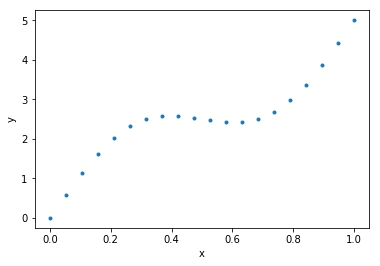

In [2]:
nb_var_in = 1 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 20  #Number of datapoints

#A0 = np.array([-.2, -.2, .2, .3, 1])[:,None]
A0 = np.random.rand(nb_var_in,1)
X = np.linspace(0,1,nb_data)[:,None]
Y = np.sin(X*np.pi*2) + X*5 + np.random.normal(size=(nb_data,1), scale = 1e-10)
plt.plot(X,Y,'.')
plt.xlabel('x')
plt.ylabel('y')

### Calculate LS and Weighted LS 

In [3]:
#Calculate LS
A = dot(inv(dot(X.T,X)),dot(X.T, Y)) 

#Calculate Weighted LS
#the weight here is defined arbitrarily as cos function of the input
W = np.diag(np.cos(np.linspace(0,np.pi/2,nb_data))**6)
Aw = dot(inv(dot(X.T,dot(W,X))),dot(X.T, dot(W,Y)))

### Plot prediction

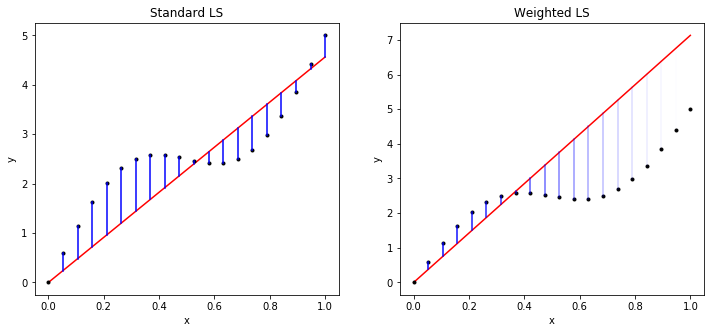

In [4]:
plt.figure(figsize=(12,5))

#plot standard LS
Y_pred = np.dot(X,A)
plot_title = 'Standard LS'
plt.subplot(1,2,1)
plot_data_2D(X,Y,Y_pred, title = plot_title)


#plot weighted LS
Y_pred = np.dot(X,Aw)
alphas = np.power(np.diagonal(W),0.3)
plot_title = 'Weighted LS'
plt.subplot(1,2,2)
plot_data_2D(X,Y,Y_pred, alphas = alphas, title = plot_title)

## Iteratively Reweighted Least Square (IRLS)

### Generate Data with outliers

Text(0.5,1,'Data points')

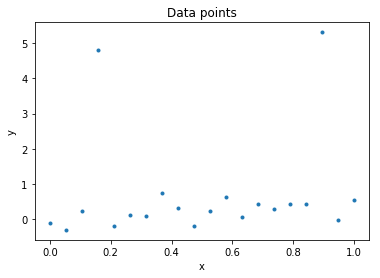

In [5]:
nb_var_in = 1 #Dimension of input vector
nb_var_out = 1 #Dimension of output vector
nb_data = 20  #Number of datapoints
nb_iter = 10 #number of re-weighting iterations
p = 1 #L1 norm

A0 = np.random.rand(nb_var_in,nb_var_out)
X = np.linspace(0,1,nb_data)[:,None]
Y = dot(X,A0) + np.random.normal(size=(nb_data,nb_var_out), scale = 0.2)
#add outliers
Y[3] += 5
Y[17] += 5
plt.plot(X,Y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')

### Calculate LS and Iterative Re-weighted LS

In [6]:
#Calculate LS
A = dot(inv(dot(X.T,X)),dot(X.T, Y))
Y_pred_ls = dot(X,A)
e_ls = np.linalg.norm(Y-Y_pred_ls,ord = 1)
plot_title_ls = 'LS (e={0:0.2f})'.format(e_ls)

#Calculate IRLS
W = np.eye(nb_data)
res_set = []
for i in range(nb_iter):
    Aw = dot(inv(dot(X.T,dot(W,X))),dot(X.T, dot(W,Y)))
    diff = np.abs(Y-dot(X,Aw)).flatten()
    res_set.append(np.sum(diff))
    W = np.diag(diff**(p-2))

Y_pred_irls = dot(X,Aw)
e_irls = np.linalg.norm(Y-Y_pred_irls,ord = 1)
plot_title_irls = 'IRLS (e={0:0.2f})'.format(e_irls)

print('L1 norm error of standard LS is: {0:0.2f}'.format(e_ls))
print('L1 norm error of Iterative Re-weighted LS is: {0:0.2f}'.format(e_irls))

L1 norm error of standard LS is: 16.50
L1 norm error of Iterative Re-weighted LS is: 12.97


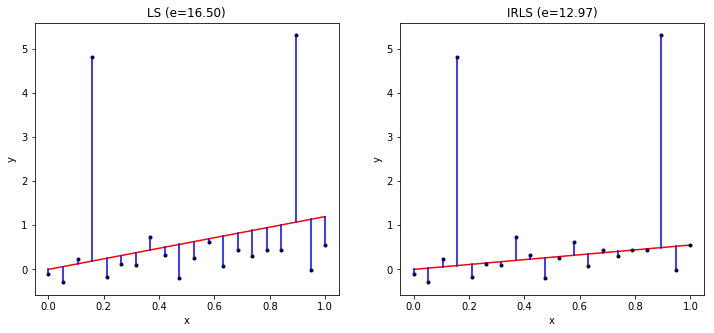

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_data_2D(X,Y,Y_pred_ls, title = plot_title_ls)
plt.subplot(1,2,2)
plot_data_2D(X,Y,Y_pred_irls, title = plot_title_irls)